In [2]:
"""

Author: Camila Losada
"""

'\n\nAuthor: Camila Losada\n'

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from compdec_v4pfclip_01.utils.structures.lfp_data import LfpData
from compdec_v4pfclip_01.utils.trials import align_trials
from compdec_v4pfclip_01.utils import config_task

In [ ]:
subject = "Riesling"
area = "LIP"
date = '2022-11-22_10-59-03'

f_lp = np.nan
f_hp = np.nan

basepath = '...'

In [5]:
lfp = LfpData.from_python_hdf5(f'{basepath}/session_struct/{area}/lfp_h{f_hp}_l{f_lp}/{date}_{subject}_{area}_e1_r1_lfp.h5')

In [6]:
# Atributes within LfpData
lfp.__dict__.keys()

dict_keys(['date_time', 'subject', 'area', 'experiment', 'recording', 'lfps', 'ch_row', 'ch_col', 'block', 'trial_error', 'code_samples', 'code_numbers', 'position', 'pos_code', 'sample_id', 'test_stimuli', 'test_distractor', 'filt', 'f_lp', 'f_hp'])

In [7]:
# Create mask for correct trials during block 1 (DMS task)
mask_correct = lfp.trial_error==0
mask_block = lfp.block==1
mask = np.logical_and(mask_correct,mask_block)

In [8]:
itr = 0
print(f"Sample onset code: {config_task.EVENTS_B1['sample_on']}")
print(f"List of events codes during trial {itr}: {lfp.code_numbers[mask][itr]}")
print(f"List of events times during trial {itr}: {lfp.code_samples[mask][itr]}")

Sample onset code: 23
List of events codes during trial 0: [ 9.  7. 35.  8. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33.  4. 36. 34.
 96. 18.]
List of events times during trial 0: [1000. 1008. 1012. 1016. 1224. 1683. 2188. 2647. 2648. 3106. 3106. 3565.
 3565. 4024. 4024. 4232. 4236. 4236. 4538. 4538.]


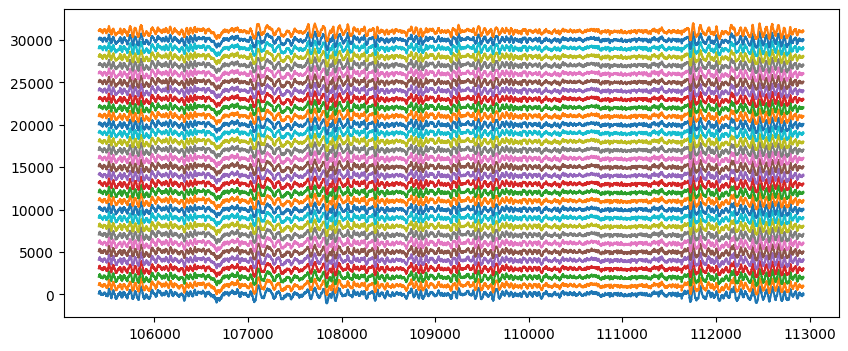

In [9]:
# Align trials to sample onset
# Select the time for the event 'sample_on'
itr = 14
shifts = (lfp.code_samples[mask][:,4]).astype(int) 
lfp_align = align_trials.indep_roll(lfp.lfps[mask],-np.expand_dims(shifts,axis=-1),axis=2)
# Plot
fig,ax=plt.subplots(figsize=(10,4))
for i in range(32):
    ax.plot(np.arange(lfp_align.shape[2])+itr*lfp_align.shape[2],lfp_align[:,i][itr]+i*1000)

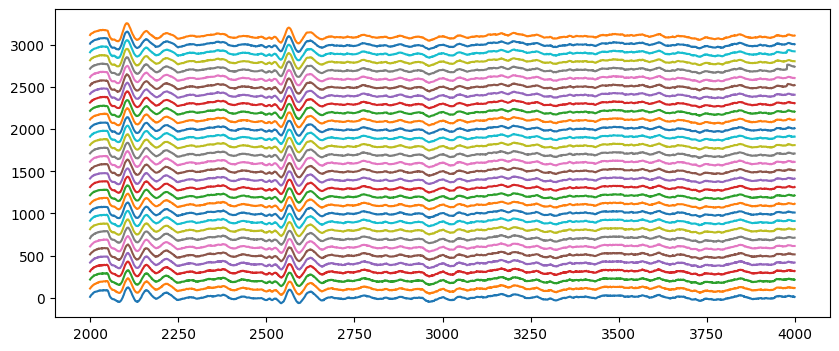

In [20]:
# Align trials to sample onset
# Select the time for the event 'sample_on'
shifts = (lfp.code_samples[mask][:,4]).astype(int) 
lfp_align = align_trials.indep_roll(lfp.lfps[mask],-np.expand_dims(shifts,axis=-1),axis=2)
mean_lfp_align = np.nanmean(lfp_align,axis=0)[:,:2000]
# Plot
fig,ax=plt.subplots(figsize=(10,4))
for i in range(32):
    ax.plot(np.arange(mean_lfp_align.shape[1])+mean_lfp_align.shape[1],mean_lfp_align[i]+i*100)